# Predicting Demand for a  Bicycle Sharing Company.

##  | CRISP-DM |


## Introduction:
    
Bicycle Sharing Systems are a means of renting bicycles where the process of obtaining membership,
rental,and bike return is automated via a network of bike-stations located throughout a city. 
The  users of bike sharing systems can pick up bicycles from a bike-station in one location and return them to another in possibly any location of the city.Bike Sharing System ensures that pollution is reduced with use of bicycles there is reduction in use of motor vehicles which leads to reduction in emission of pollutants in the air. 

## Project-Description:

This project work, focuses on which algorithm can work better for the real world problem of
bicycle sharing demand prediction and there after recommending which are the important factors for predicting the demand.


## Problem-Statement:

   In a bicycle sharing systems it is very important for
   the administrators to know how many cycles will be
   needed in each bicycle station, knowing this count, it enables
   them to arrange proper number of cycles at the stations and
   decide whether a particular station needs to have extra number of bicycle at that stands.
   Utilizing a seperate weather data and not the usage pattern here, its needed to forecast bike rental demand in the    Capital          Bikeshare program in Washington, D.C.
   
## Business Goal:

To predict the demand of the bicycles for rent on a given day on the basis of the  data set provided so that utilization of the cycles are maximum there by resulting in maximising the revenue.Also Identifying the major features for predicting.
   
   
## Data-Source:

The dataset in this project is provided by Kaggle and is an open dataset hosted at UCI Machine Learning Repository
"<b> Bike Sharing Data Set</b>"

## Data:

#### Independent Variables:

<br/><b>datetime</b> - hourly date + timestamp (2011-12) <br>
<b>season</b> -  1 = spring, 2 = summer, 3 = fall, 4 = winter <br>
<b>holiday</b> - whether the day is considered a holiday <br>
<b>workingday</b> - whether the day is neither a weekend nor holiday
<br/>
<b>weather</b> -<br/> 1: Clear, Few clouds, Partly cloudy, Partly cloudy   
          2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist   
          3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
          4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog <br/>
<br/>
<b>temp</b> - temperature in Celsius  <br>
<b>atemp</b> - "feels like" temperature in Celsius  <br>
<b>humidity</b> - relative humidity  <br>
<b>windspeed</b> - wind speed   <br>
<b>casual</b> - number of non-registered user rentals initiated   <br>
<b>registered</b> - number of registered user rentals initiated   <br>

#### Dependent Variable:
<b>count</b> - number of total rentals   <br/>





#### Initial Overview

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math

In [3]:
train=pd.read_csv(r'C:\Users\DEBADRITO\Desktop\PROJECT FOR CV\bike sharing\train.csv')
df=train.copy()
df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
test=pd.read_csv(r'C:\Users\DEBADRITO\Desktop\PROJECT FOR CV\bike sharing\test.csv')
test_df=test.copy()
test_df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [5]:
df.columns.unique()

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

## Simple EDA,Descriptive Statistics and Data Wranglingling with Target Variable

#### Categorical

In [8]:
df.season.value_counts()

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

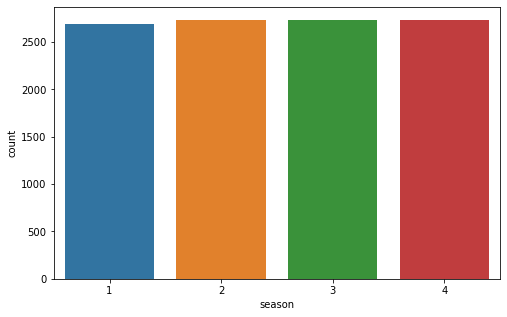

In [9]:
plt.figure(figsize=(8,5))
sns.countplot(x='season',data=df)

In [10]:
# count vs season

Text(0, 0.5, 'Total Rent Counts')

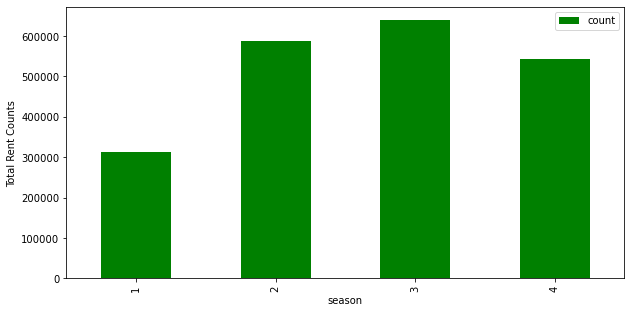

In [11]:
df.groupby(['season']).agg({'count':'sum'}).plot.bar(cmap="ocean",width = 0.5,figsize=(10,5))
plt.ylabel("Total Rent Counts")

summer and fall has more total rent

In [12]:
df.holiday.value_counts()

0    10575
1      311
Name: holiday, dtype: int64

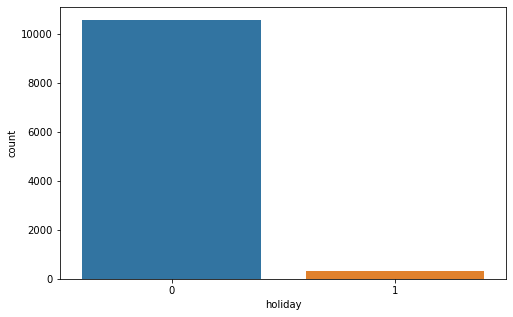

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(x='holiday',data=df)

Total Holiday is very less

In [14]:
# count vs holiday

Text(0, 0.5, 'Total Rent Counts in (Millions)')

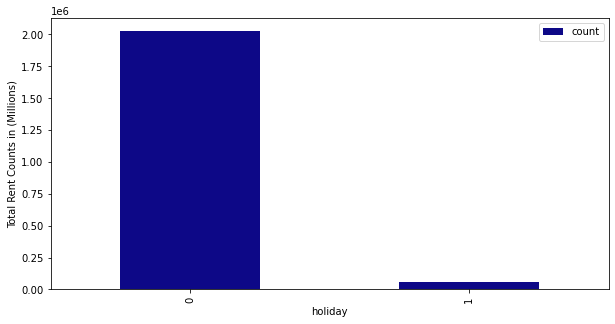

In [15]:
df.groupby(['holiday']).agg({'count':'sum'}).plot.bar(cmap="plasma",width = 0.5,figsize=(10,5))
plt.ylabel("Total Rent Counts in (Millions)")

When its not a holiday total rent count is more

In [16]:
df.workingday.value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

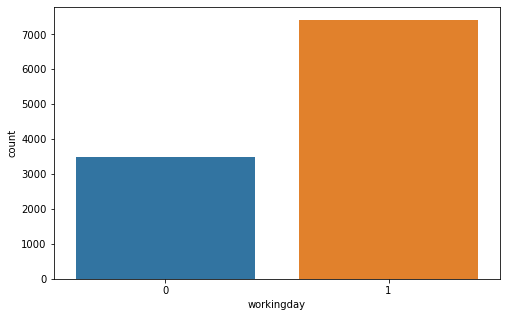

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(x='workingday',data=df)

When its not a working day its weekend which may include a part of a holiday but not fully.
Working day is neither a holiday nor a weekend.

In [18]:
# count vs workingday

Text(0, 0.5, 'Total Rent Counts in (Millions)')

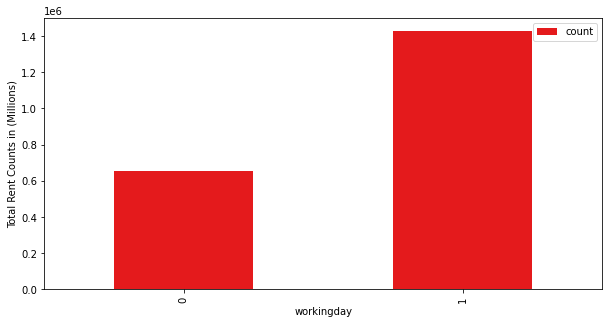

In [19]:
df.groupby(['workingday']).agg({'count':'sum'}).plot.bar(cmap="Set1",width = 0.5,figsize=(10,5))
plt.ylabel("Total Rent Counts in (Millions)")

When its not a workingday total rent count is less

In [20]:
df.weather.value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

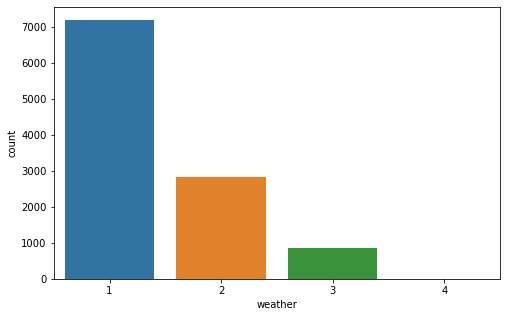

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(x='weather',data=df)

Spring and Summer has more number of records

In [22]:
# count vs weather

Text(0, 0.5, 'Total Rent Counts in (Millions)')

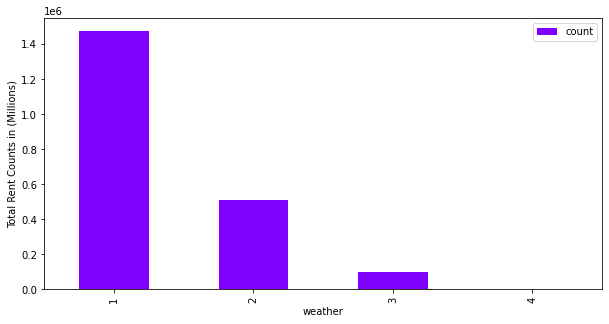

In [23]:
df.groupby(['weather']).agg({'count':'sum'}).plot.bar(cmap="rainbow",width = 0.5,figsize=(10,5))
plt.ylabel("Total Rent Counts in (Millions)")

Spring and summer having more number of total rents count

In [24]:
#Describing the data

In [25]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


#### Continuos

temp

In [26]:
# Mean temp

Mean_temp=np.mean(df['temp'])
Mean_temp

20.230859819952173

In [27]:
# Median temp
Median_temp=np.median(df['temp'])
Median_temp

20.5

In [28]:
#Mode temp
Mode_temp=df["temp"].mode()
Mode_temp

0    14.76
dtype: float64

In [29]:
Mode_temp=14.76

<function matplotlib.pyplot.show(*args, **kw)>

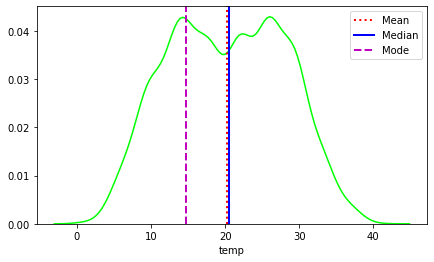

In [30]:
plt.figure(figsize=(7,4))

ax=sns.distplot(df['temp'],hist=False,bins=30,color="lime")

ax.axvline(Mean_temp,label='Mean',color='r',linestyle=":",linewidth=2)

ax.axvline(Median_temp,label='Median',color='b',linestyle="-",linewidth=2)

ax.axvline(Mode_temp,label='Mode',color='m',linestyle="--",linewidth=2)

plt.legend({'Mean':Mean_temp,'Median':Median_temp,'Mode':Mode_temp})


plt.show

In [31]:
# Kurtosis
stats.kurtosis(df["temp"])

-0.9146613849825282

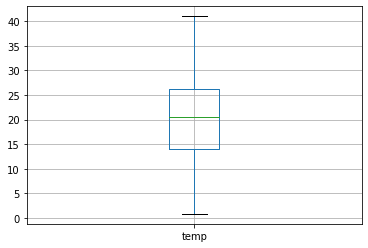

In [32]:
#Boxplot

df.boxplot(column='temp')

### Function for studying other continuos and discrete numerical variables

In [33]:
def desc_stat(x):
    
     
            
       Median = np.median(df[x]) 
       
       Mean   = np.mean(df[x])
    
       Mode   =  df[x].mode()[0]     
       
       plt.figure(figsize=(7,4))

       ax=sns.distplot(df[x],hist=False,bins=30,color="lime")

       ax.axvline(Mean,label='Mean',color='r',linestyle=":",linewidth=3)

       ax.axvline(Median,label='Median',color='b',linestyle="-",linewidth=2)
    
       ax.axvline(Mode,label='Median',color='g',linestyle="-",linewidth=2)

       plt.legend({'Mean':Mean,'Median':Median,'Mode':Mode})


       plt.show

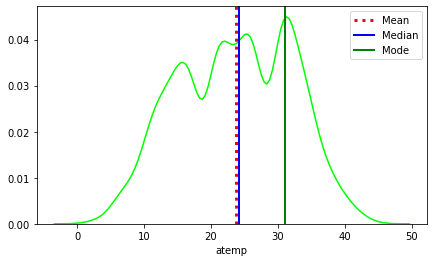

In [34]:
desc_stat("atemp")

negatively skewed

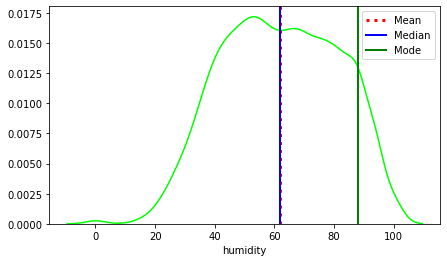

In [35]:
desc_stat("humidity")

negatively skewed

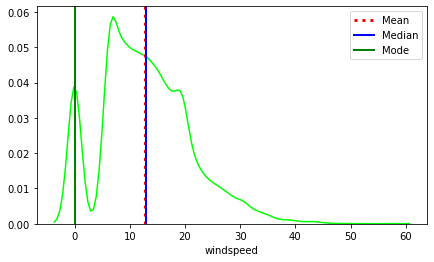

In [36]:
desc_stat("windspeed")

positively skewed

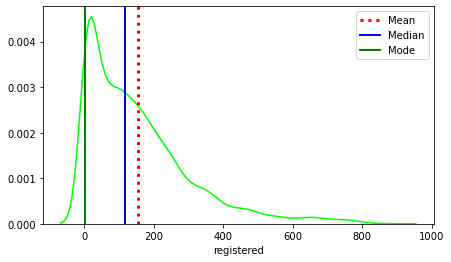

In [37]:
desc_stat("registered")

positively skewed

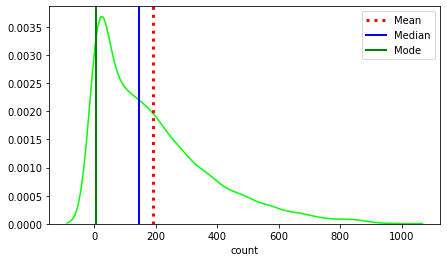

In [38]:
desc_stat("count")

positively skewed

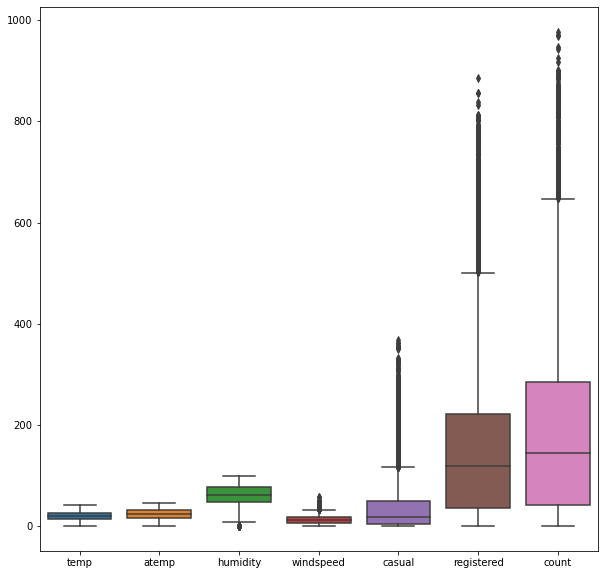

In [39]:
#boxplot

plt.figure(figsize=(10,10))

sns.boxplot(data=df[['temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']])

In [40]:
# Analysing heat map for continuos data

In [41]:
#Correlation
cor = df.corr()
cor

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


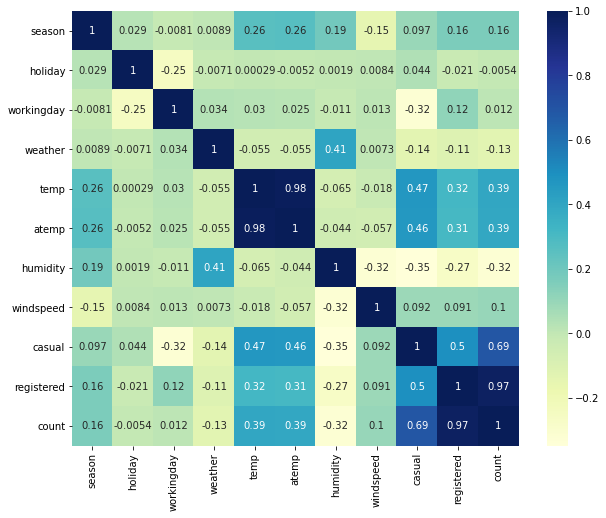

In [42]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

<b>SOME HEATMAP INFERENCE</b>:-

temp and atemp are highly correlated.

humidity is inversely correlated to count as expected as the weather is humid people will not like to travel on a bike.

casual and working day are inversely related because of the purpose.

weather and count are inversely related. This is because for the data as weather increases from (1 to 4) implies that weather is getting more worse and so less people will rent bikes.

temp(or atemp) effects the count.

registered/casual and count are highly related which indicates that most of the bikes that are rented are registered and have unique identifier.

weather and humidity correlated

temp and humidity inversely correlated

humidity and windspeed inversely correlated

workingday and holiday are inversely related

## DATA PREPRATION AND PREPROCESSING

In [43]:
#Creating Dummies so that the encoded categorical column values doessnot have directionality or ordered arrangement
#(Ordinality-remove).They are just labels

In [44]:
# season (df and test df)

In [45]:
season=pd.get_dummies(df['season'],prefix='season')
df=pd.concat([df,season],axis=1)
df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,0,0,0


In [46]:
season=pd.get_dummies(test_df['season'],prefix='season')
test_df=pd.concat([test_df,season],axis=1)
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,1,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0


In [47]:
# weather (df and test df)

In [48]:
weather=pd.get_dummies(df['weather'],prefix='weather')
df=pd.concat([df,weather],axis=1)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,0,0,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,0,0,0,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,0,0,0,1,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,0,0,0,1,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,0,0,0,1,0,0,0


In [49]:
weather=pd.get_dummies(test_df['weather'],prefix='weather')
test_df=pd.concat([test_df,weather],axis=1)
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,1,0,0,0,1,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0


In [50]:
# dropping season and weather

In [51]:
df.drop(['season','weather'],inplace=True,axis=1)
df.head(5)


,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,3,13,16,1,0,0,0,1,0,0,0
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,8,32,40,1,0,0,0,1,0,0,0
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,5,27,32,1,0,0,0,1,0,0,0
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,3,10,13,1,0,0,0,1,0,0,0
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,0,1,1,1,0,0,0,1,0,0,0


In [52]:
test_df.drop(['season','weather'],inplace=True,axis=1)
test_df.head(5)

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-20 00:00:00,0,1,10.66,11.365,56,26.0027,1,0,0,0,1,0,0,0
1,2011-01-20 01:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
2,2011-01-20 02:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
3,2011-01-20 03:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0
4,2011-01-20 04:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0


### Splitting the date and time, as the time of day may influence the number of bikes rented.
### For eg. at office hours like early  mornning or evening
### a greater demand for rental bikes may be expected .

In [53]:
#for df

In [54]:
df["date"]=pd.to_datetime(df["datetime"])
df.head(5)

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,date
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,3,13,16,1,0,0,0,1,0,0,0,2011-01-01 00:00:00
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,8,32,40,1,0,0,0,1,0,0,0,2011-01-01 01:00:00
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,5,27,32,1,0,0,0,1,0,0,0,2011-01-01 02:00:00
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,3,10,13,1,0,0,0,1,0,0,0,2011-01-01 03:00:00
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,0,1,1,1,0,0,0,1,0,0,0,2011-01-01 04:00:00


In [55]:
df['day']=df['date'].apply(lambda x:x.day)
df['hour']=df['date'].apply(lambda x:x.hour)
df['month']=df['date'].apply(lambda x:x.month)
df['year']=df['date'].apply(lambda x:x.year)

In [56]:
df.head(5)

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,...,season_4,weather_1,weather_2,weather_3,weather_4,date,day,hour,month,year
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,3,13,16,...,0,1,0,0,0,2011-01-01 00:00:00,1,0,1,2011
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,8,32,40,...,0,1,0,0,0,2011-01-01 01:00:00,1,1,1,2011
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,5,27,32,...,0,1,0,0,0,2011-01-01 02:00:00,1,2,1,2011
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,3,10,13,...,0,1,0,0,0,2011-01-01 03:00:00,1,3,1,2011
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,0,1,1,...,0,1,0,0,0,2011-01-01 04:00:00,1,4,1,2011


In [57]:
df['year'] = df['year'].map({2011:0, 2012:1})
df.head(5)

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,...,season_4,weather_1,weather_2,weather_3,weather_4,date,day,hour,month,year
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,3,13,16,...,0,1,0,0,0,2011-01-01 00:00:00,1,0,1,0
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,8,32,40,...,0,1,0,0,0,2011-01-01 01:00:00,1,1,1,0
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,5,27,32,...,0,1,0,0,0,2011-01-01 02:00:00,1,2,1,0
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,3,10,13,...,0,1,0,0,0,2011-01-01 03:00:00,1,3,1,0
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,0,1,1,...,0,1,0,0,0,2011-01-01 04:00:00,1,4,1,0


In [58]:
#for test df

In [59]:
test_df["date"]=pd.to_datetime(test_df["datetime"])
test_df.head(5)

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,date
0,2011-01-20 00:00:00,0,1,10.66,11.365,56,26.0027,1,0,0,0,1,0,0,0,2011-01-20 00:00:00
1,2011-01-20 01:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0,2011-01-20 01:00:00
2,2011-01-20 02:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0,2011-01-20 02:00:00
3,2011-01-20 03:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0,2011-01-20 03:00:00
4,2011-01-20 04:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0,2011-01-20 04:00:00


In [60]:
test_df['day']=test_df['date'].apply(lambda x:x.day)
test_df['hour']=test_df['date'].apply(lambda x:x.hour)
test_df['month']=test_df['date'].apply(lambda x:x.month)
test_df['year']=test_df['date'].apply(lambda x:x.year)

In [61]:
test_df.head(5)

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,date,day,hour,month,year
0,2011-01-20 00:00:00,0,1,10.66,11.365,56,26.0027,1,0,0,0,1,0,0,0,2011-01-20 00:00:00,20,0,1,2011
1,2011-01-20 01:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0,2011-01-20 01:00:00,20,1,1,2011
2,2011-01-20 02:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0,2011-01-20 02:00:00,20,2,1,2011
3,2011-01-20 03:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0,2011-01-20 03:00:00,20,3,1,2011
4,2011-01-20 04:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0,2011-01-20 04:00:00,20,4,1,2011


In [62]:
test_df['year'] = test_df['year'].map({2011:0, 2012:1})
test_df.head(5)

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,date,day,hour,month,year
0,2011-01-20 00:00:00,0,1,10.66,11.365,56,26.0027,1,0,0,0,1,0,0,0,2011-01-20 00:00:00,20,0,1,0
1,2011-01-20 01:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0,2011-01-20 01:00:00,20,1,1,0
2,2011-01-20 02:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0,2011-01-20 02:00:00,20,2,1,0
3,2011-01-20 03:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0,2011-01-20 03:00:00,20,3,1,0
4,2011-01-20 04:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0,2011-01-20 04:00:00,20,4,1,0


In [63]:
# dropping datetime column (df and test).
df.drop('datetime',axis=1,inplace=True)
df.head()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,season_1,...,season_4,weather_1,weather_2,weather_3,weather_4,date,day,hour,month,year
0,0,0,9.84,14.395,81,0.0,3,13,16,1,...,0,1,0,0,0,2011-01-01 00:00:00,1,0,1,0
1,0,0,9.02,13.635,80,0.0,8,32,40,1,...,0,1,0,0,0,2011-01-01 01:00:00,1,1,1,0
2,0,0,9.02,13.635,80,0.0,5,27,32,1,...,0,1,0,0,0,2011-01-01 02:00:00,1,2,1,0
3,0,0,9.84,14.395,75,0.0,3,10,13,1,...,0,1,0,0,0,2011-01-01 03:00:00,1,3,1,0
4,0,0,9.84,14.395,75,0.0,0,1,1,1,...,0,1,0,0,0,2011-01-01 04:00:00,1,4,1,0


In [64]:
test_df.drop('datetime',axis=1,inplace=True)
test_df.head()

,holiday,workingday,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,date,day,hour,month,year
0,0,1,10.66,11.365,56,26.0027,1,0,0,0,1,0,0,0,2011-01-20 00:00:00,20,0,1,0
1,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0,2011-01-20 01:00:00,20,1,1,0
2,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0,2011-01-20 02:00:00,20,2,1,0
3,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0,2011-01-20 03:00:00,20,3,1,0
4,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0,2011-01-20 04:00:00,20,4,1,0


In [65]:
# Heat-Map after dummies

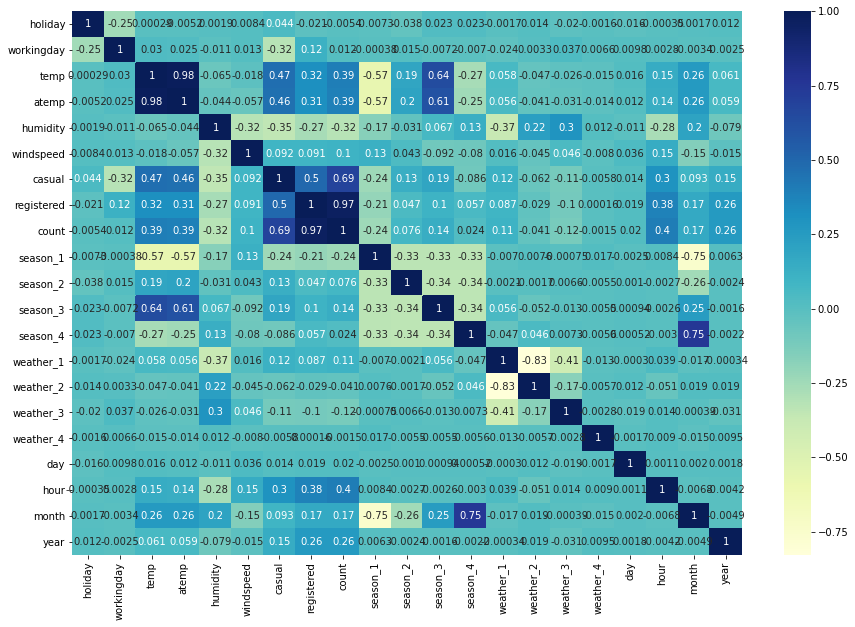

In [66]:
# plotting correlations on a heatmap for the prepared data
cor = df.corr()
cor
# figure size
plt.figure(figsize=(15,10))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [67]:
#dropping casual and rental as both of their total is accounted in count variable

df.drop(['casual','registered'],axis=1,inplace=True)
df.head(5)

,holiday,workingday,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,date,day,hour,month,year
0,0,0,9.84,14.395,81,0.0,16,1,0,0,0,1,0,0,0,2011-01-01 00:00:00,1,0,1,0
1,0,0,9.02,13.635,80,0.0,40,1,0,0,0,1,0,0,0,2011-01-01 01:00:00,1,1,1,0
2,0,0,9.02,13.635,80,0.0,32,1,0,0,0,1,0,0,0,2011-01-01 02:00:00,1,2,1,0
3,0,0,9.84,14.395,75,0.0,13,1,0,0,0,1,0,0,0,2011-01-01 03:00:00,1,3,1,0
4,0,0,9.84,14.395,75,0.0,1,1,0,0,0,1,0,0,0,2011-01-01 04:00:00,1,4,1,0


### Verifying how counts varies with different features :-

Text(0, 0.5, 'Total Rent Counts')

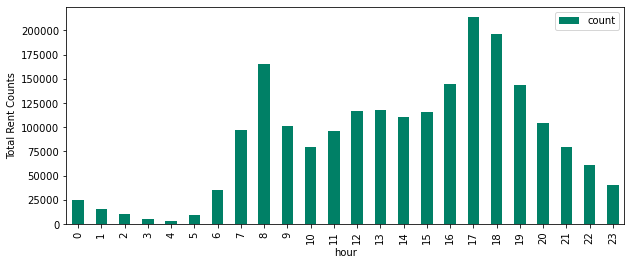

In [68]:
df.groupby(['hour']).agg({'count':'sum'}).plot.bar(cmap="summer", width = 0.5,figsize=(10,4))
plt.ylabel("Total Rent Counts")

Here we can observe that around 7-9am in the morning and around 4pm-7pm there is a peak in count
might because of office/duty etc hours

Dec-Feb there is a lesser rent may be because of winter season

There is a growth in the numbers of rent from 2011 to 2014

Text(0, 0.5, 'Total Rent Counts')

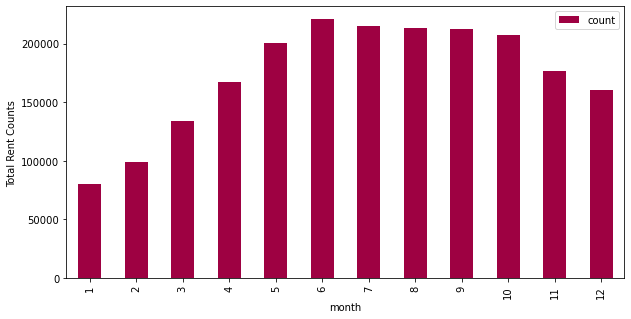

In [69]:
df.groupby(['month']).agg({'count':'sum'}).plot.bar(cmap="Spectral",width = 0.5,figsize=(10,5))
plt.ylabel("Total Rent Counts")

Total rents count follows a cyclic pattern peaking during summers and dipping in winters

In [70]:
df.groupby(['year']).agg({'count':'sum'})

,count
year,
0,781979
1,1303497


Text(0.5, 0, 'Millions')

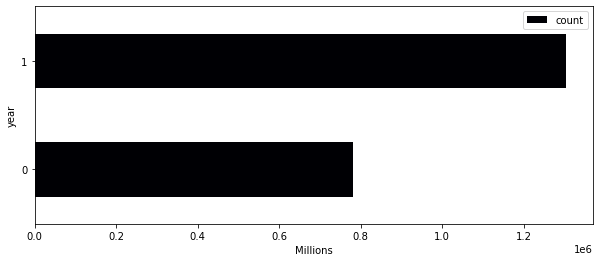

In [71]:
df.groupby(['year']).agg({'count':'sum'}).plot.barh(cmap="magma", width = 0.5,figsize=(10,4))
plt.xlabel("Millions")


Rise in total rents from 2011 to 2012

In [72]:
# Removing Dummy Trap, as K-1 dummy is sufficient , Eliminating season_4 and weather_4 from df and test as its value is captured
# by K-1 dummies

In [73]:
df.drop(['season_4','weather_4'],inplace=True,axis=1)
df.head(5)

,holiday,workingday,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,weather_1,weather_2,weather_3,date,day,hour,month,year
0,0,0,9.84,14.395,81,0.0,16,1,0,0,1,0,0,2011-01-01 00:00:00,1,0,1,0
1,0,0,9.02,13.635,80,0.0,40,1,0,0,1,0,0,2011-01-01 01:00:00,1,1,1,0
2,0,0,9.02,13.635,80,0.0,32,1,0,0,1,0,0,2011-01-01 02:00:00,1,2,1,0
3,0,0,9.84,14.395,75,0.0,13,1,0,0,1,0,0,2011-01-01 03:00:00,1,3,1,0
4,0,0,9.84,14.395,75,0.0,1,1,0,0,1,0,0,2011-01-01 04:00:00,1,4,1,0


In [74]:
test_df.drop(['season_4','weather_4'],inplace=True,axis=1)
test_df.head(5)

,holiday,workingday,temp,atemp,humidity,windspeed,season_1,season_2,season_3,weather_1,weather_2,weather_3,date,day,hour,month,year
0,0,1,10.66,11.365,56,26.0027,1,0,0,1,0,0,2011-01-20 00:00:00,20,0,1,0
1,0,1,10.66,13.635,56,0.0000,1,0,0,1,0,0,2011-01-20 01:00:00,20,1,1,0
2,0,1,10.66,13.635,56,0.0000,1,0,0,1,0,0,2011-01-20 02:00:00,20,2,1,0
3,0,1,10.66,12.880,56,11.0014,1,0,0,1,0,0,2011-01-20 03:00:00,20,3,1,0
4,0,1,10.66,12.880,56,11.0014,1,0,0,1,0,0,2011-01-20 04:00:00,20,4,1,0


In [75]:
df.shape

(10886, 18)

In [76]:
# we are not replacing outliers with median because it might require business expert's advice

In [77]:
#Scaling the data 
#(Eventhough Standardization deals with outliers and not put the data in fixed scale between 0-1 as in MinMax normalisation
#Yet we have used MinMax normalisation because my categorical variables are 0s and 1s so I bounded the range of my continuous
#variables also between 0s and 1s so that uniformity is maintained)

In [78]:
from sklearn.preprocessing import MinMaxScaler

In [79]:
scaler = MinMaxScaler()

In [80]:
df.columns.unique()

Index(['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'count', 'season_1', 'season_2', 'season_3', 'weather_1', 'weather_2',
       'weather_3', 'date', 'day', 'hour', 'month', 'year'],
      dtype='object')

In [81]:
X_independent= df[['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
                   'season_1', 'season_2', 'season_3', 'weather_1', 'weather_2',
       'weather_3', 'day', 'hour', 'month', 'year']]

#Not including date as substituted by month,year,day and hour

In [82]:
X_independent.head(5)

,holiday,workingday,temp,atemp,humidity,windspeed,season_1,season_2,season_3,weather_1,weather_2,weather_3,day,hour,month,year
0,0,0,9.84,14.395,81,0.0,1,0,0,1,0,0,1,0,1,0
1,0,0,9.02,13.635,80,0.0,1,0,0,1,0,0,1,1,1,0
2,0,0,9.02,13.635,80,0.0,1,0,0,1,0,0,1,2,1,0
3,0,0,9.84,14.395,75,0.0,1,0,0,1,0,0,1,3,1,0
4,0,0,9.84,14.395,75,0.0,1,0,0,1,0,0,1,4,1,0


In [83]:
X_independent.shape

(10886, 16)

In [84]:
names = X_independent.columns
scaled_df = scaler.fit_transform(X_independent)
scaled_df = pd.DataFrame(scaled_df, columns=names)

In [85]:
y=df["count"]
y

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [86]:
X=scaled_df
X.head(5)

,holiday,workingday,temp,atemp,humidity,windspeed,season_1,season_2,season_3,weather_1,weather_2,weather_3,day,hour,month,year
0,0.0,0.0,0.224490,0.305068,0.81,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.204082,0.288064,0.80,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.043478,0.0,0.0
2,0.0,0.0,0.204082,0.288064,0.80,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.086957,0.0,0.0
3,0.0,0.0,0.224490,0.305068,0.75,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.130435,0.0,0.0
4,0.0,0.0,0.224490,0.305068,0.75,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.173913,0.0,0.0


## MODELLING PHASE

### LINEAR REGRESSION

In [87]:
# split into train and test (random_state is a pseudo number which fixes the outcome in every run or
# else the distribution in traintest split every time will be different)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [88]:
# Building the first model with all the features

from sklearn.linear_model import LinearRegression

# instantiate

lm = LinearRegression()

# fit

lm.fit(X_train, y_train)

LinearRegression()

In [89]:
# print coefficients and intercept

coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
holiday,-13.715647
workingday,-0.185160
temp,240.827537
atemp,102.426020
humidity,-190.054567
windspeed,30.187555
season_1,14.005039
season_2,7.639326
season_3,-41.576393
weather_1,7.711626


Slopes of which features are important are showcased here

In [90]:
print('intercept:',lm.intercept_)

intercept: -51.01010360410774


In [91]:
# predict 

y_pred = lm.predict(X_test)

# metrics
from sklearn.metrics import r2_score

print("R2-Scorer :- ",r2_score(y_true=y_test, y_pred=y_pred))


R2-Scorer :-  0.40129074562776146


In [92]:
from sklearn import metrics

print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 105.63152094637618
MSE: 19347.6756644924
RMSE: 139.09592253007418


In [93]:
X_train.head(2)

,holiday,workingday,temp,atemp,humidity,windspeed,season_1,season_2,season_3,weather_1,weather_2,weather_3,day,hour,month,year
8414,0.0,1.0,0.693878,0.711825,0.58,0.298225,0.0,0.0,1.0,0.0,1.0,0.0,0.555556,1.000000,0.545455,1.0
6601,0.0,1.0,0.326531,0.355856,0.61,0.157870,1.0,0.0,0.0,1.0,0.0,0.0,0.611111,0.347826,0.181818,1.0


Text(0, 0.5, 'y Dependent Variable')

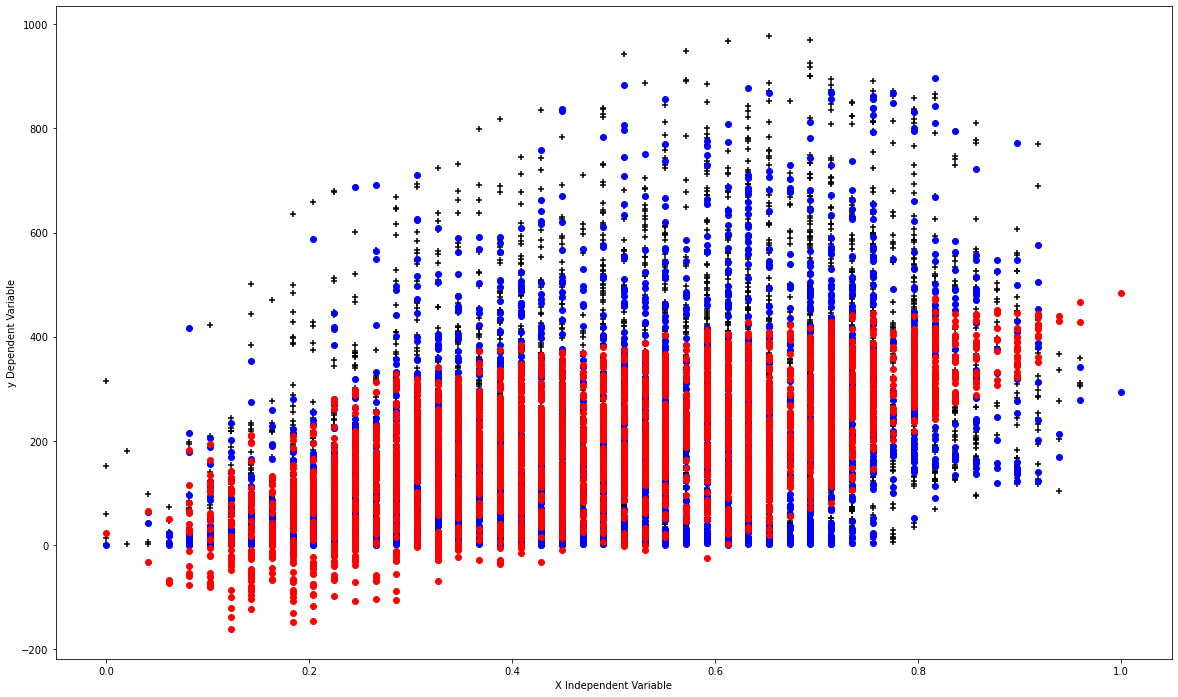

In [94]:
#taking temp-X(independent) count-y(dependent)
plt.figure(figsize=(20, 12))
plt.scatter(X_train.iloc[:,2],y_train, c='black', marker='+')
plt.scatter(X_test.iloc[:,2],y_test, c='blue')
plt.scatter(X_test.iloc[:,2], y_pred, c ='red')

plt.xlabel("X Independent Variable")
plt.ylabel('y Dependent Variable')

### KNN REGRESSION

In [95]:
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.metrics import mean_squared_error
from math import sqrt

In [96]:
model=KNR(n_neighbors=3)

In [97]:
model.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [98]:
model.metric

'minkowski'

In [99]:
 pred_knn=model.predict(X_test)

In [100]:
print("MAE:", metrics.mean_absolute_error(y_test, pred_knn))
print('MSE:', metrics.mean_squared_error(y_test, pred_knn))
print('RMSE:',sqrt(metrics.mean_squared_error(y_test, pred_knn)))  #FOR K=3

MAE: 66.35660338844662
MSE: 10802.713410900184
RMSE: 103.93610253853174


In [101]:
rmse_val=[]
for k in range(30):
  k=k+1
  model=KNR(n_neighbors= k)
  model.fit(X_train,y_train)
  pred=model.predict(X_test)
  error=sqrt(mean_squared_error(y_test,pred))
  rmse_val.append(error)
  print('RMSE Value for k=',k,'is: ',error)

RMSE Value for k= 1 is:  116.49653927036559
RMSE Value for k= 2 is:  105.43206129972108
RMSE Value for k= 3 is:  103.93610253853174
RMSE Value for k= 4 is:  105.75991480594703
RMSE Value for k= 5 is:  106.27901521618223
RMSE Value for k= 6 is:  107.4272501318861
RMSE Value for k= 7 is:  108.21524706719573
RMSE Value for k= 8 is:  109.16747677796985
RMSE Value for k= 9 is:  109.95180839163454
RMSE Value for k= 10 is:  111.2833788452973
RMSE Value for k= 11 is:  111.85899102966961
RMSE Value for k= 12 is:  112.96487963488777
RMSE Value for k= 13 is:  114.26850148580468
RMSE Value for k= 14 is:  115.0996719893043
RMSE Value for k= 15 is:  115.98585385092998
RMSE Value for k= 16 is:  116.80162753800901
RMSE Value for k= 17 is:  117.64287058032468
RMSE Value for k= 18 is:  118.30878037642147
RMSE Value for k= 19 is:  119.17727487509848
RMSE Value for k= 20 is:  119.9156839487194
RMSE Value for k= 21 is:  120.57356616638147
RMSE Value for k= 22 is:  120.81249021322652
RMSE Value for k= 23 is

Text(0, 0.5, 'RMSE')

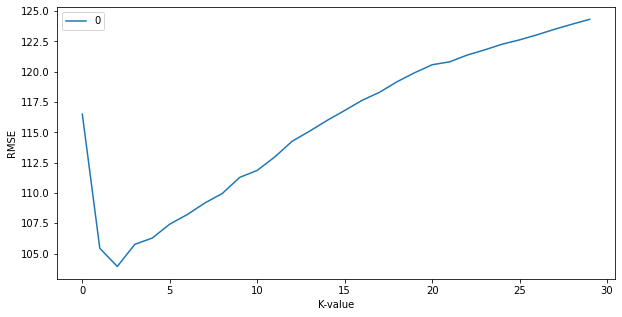

In [102]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot(figsize=(10,5))
plt.xlabel("K-value")
plt.ylabel("RMSE")

At K = 3 RMSE is least

In [103]:
# We are not using R2 score here as the model is non-parametric and non-linear

### Decision Tree Regression

In [104]:
from sklearn.tree import DecisionTreeRegressor 

In [105]:
regressor = DecisionTreeRegressor() 

In [106]:
regressor.fit(X_train, y_train) 

DecisionTreeRegressor()

In [107]:
regressor.criterion

'mse'

In [108]:
#instead of std dev , mse is used default for splitting

In [109]:
Desc_pred=model.predict(X_test)

In [110]:
print('RMSE:',sqrt(metrics.mean_squared_error(y_test, Desc_pred)))

RMSE: 124.31780880156097


### Random Forest

In [111]:
from sklearn.ensemble import RandomForestRegressor

In [112]:
model_RF=RandomForestRegressor(random_state=0)

In [113]:
#checking the default and hyperparameters

In [114]:
print("Splitting Criteria: ", model_RF.criterion)

print("Nos. of Trees: ", model_RF.n_estimators)

print("max depth: " , model_RF.max_depth)

print("Base Estimator: " , model_RF.base_estimator)

print("Max Features: ", model_RF.max_features)

print("Min Sample Split: ", model_RF.min_samples_split)

print("Bootstrap: ", model_RF.bootstrap)

Splitting Criteria:  mse
Nos. of Trees:  100
max depth:  None
Base Estimator:  DecisionTreeRegressor()
Max Features:  auto
Min Sample Split:  2
Bootstrap:  True


In [115]:
model_RF.fit(X_train, y_train)
pred_rf= model_RF.predict(X_test)

In [116]:
print('RMSE:',sqrt(metrics.mean_squared_error(y_test, pred_rf)))

RMSE: 42.682001391383174


In [117]:
rmse_values=[]
for trees in range(100):
  trees=trees+1
  model_RF=RandomForestRegressor(n_estimators=trees,random_state=0)
  model_RF.fit(X_train,y_train)
  pred_rf=model_RF.predict(X_test)
  error=sqrt(mean_squared_error(y_test,pred_rf))
  rmse_values.append(error)  

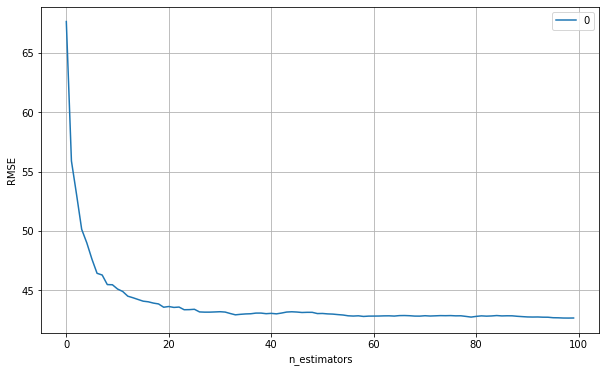

In [118]:
curve = pd.DataFrame(rmse_values)
curve.plot(figsize=(10,6))
plt.xlabel("n_estimators")
plt.ylabel("RMSE")
plt.grid()

<b>We can observe that there is drastic dip in the RMSE values as we have increased the number of trees and<br/>
and then the RMSE remains consistent from n_estimators=20 and there on.</b>

##### Feature importances in Random Forest Model

In [119]:
df_feature_importance = pd.DataFrame(model_RF.feature_importances_, index=X_train.columns, columns=['feature importance']).sort_values('feature importance', ascending=False)
df_feature_importance

,feature importance
hour,0.603165
year,0.088537
workingday,0.074224
temp,0.069278
month,0.046434
atemp,0.039801
humidity,0.031583
day,0.012025
weather_3,0.011699
windspeed,0.009281


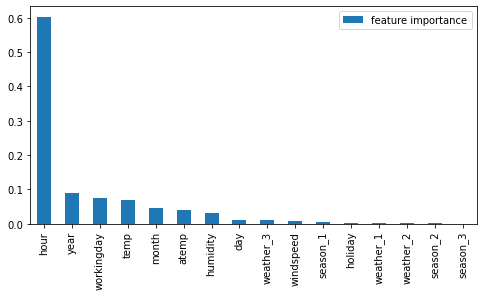

In [120]:
df_feature_importance.plot.bar(figsize=(8,4))

## OBSERVATIONS
#### RMSE for all the Models

In [121]:
#Random Forest

print('Random Forest RMSE:',sqrt(metrics.mean_squared_error(y_test, pred_rf)))

#Decision Tree

print('Decision Tree RMSE:',sqrt(metrics.mean_squared_error(y_test, Desc_pred)))

#KNN

print('KNN Regressor RMSE:',sqrt(metrics.mean_squared_error(y_test, pred_knn)))

#Linear Regreaaion

print('Linear Regression RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Random Forest RMSE: 42.682001391383174
Decision Tree RMSE: 124.31780880156097
KNN Regressor RMSE: 103.93610253853174
Linear Regression RMSE: 139.09592253007418


#### Random Forest has least RMSE

##### NOW WORKING WITH TEST DATA FRAME

In [122]:
X_independent_test= test_df[['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
                   'season_1', 'season_2', 'season_3', 'weather_1', 'weather_2',
       'weather_3', 'day', 'hour', 'month', 'year']]

In [123]:
X_independent_test.head(5)

,holiday,workingday,temp,atemp,humidity,windspeed,season_1,season_2,season_3,weather_1,weather_2,weather_3,day,hour,month,year
0,0,1,10.66,11.365,56,26.0027,1,0,0,1,0,0,20,0,1,0
1,0,1,10.66,13.635,56,0.0000,1,0,0,1,0,0,20,1,1,0
2,0,1,10.66,13.635,56,0.0000,1,0,0,1,0,0,20,2,1,0
3,0,1,10.66,12.880,56,11.0014,1,0,0,1,0,0,20,3,1,0
4,0,1,10.66,12.880,56,11.0014,1,0,0,1,0,0,20,4,1,0


In [124]:
X_independent_test.shape

(6493, 16)

In [125]:
#MinMax scaling of Test Df

In [126]:
names = X_independent_test.columns
scaled_df_test = scaler.fit_transform(X_independent_test)
scaled_df_test = pd.DataFrame(scaled_df_test, columns=names)

In [127]:
X_test_df=scaled_df_test
X_test_df.head(5)

,holiday,workingday,temp,atemp,humidity,windspeed,season_1,season_2,season_3,weather_1,weather_2,weather_3,day,hour,month,year
0,0.0,1.0,0.25,0.2273,0.47619,0.464346,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,1.0,0.25,0.2727,0.47619,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.043478,0.0,0.0
2,0.0,1.0,0.25,0.2727,0.47619,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.086957,0.0,0.0
3,0.0,1.0,0.25,0.2576,0.47619,0.196458,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.130435,0.0,0.0
4,0.0,1.0,0.25,0.2576,0.47619,0.196458,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.173913,0.0,0.0


#### Fitting Random Forest Model

In [128]:
pred_rf_test=model_RF.predict(X_test_df)

In [129]:
#We cannot check the RMSE for pred_rf_test with the existing y_test because sizes are different and we cant take inappropriate
#sample from y_test for evaluation

In [130]:
#Downloading CSV

In [131]:
Final_Prediction = pd.DataFrame(pred_rf_test)

In [132]:
Final_Prediction_csv=Final_Prediction.to_csv(r"C:\Users\DEBADRITO\Desktop\PROJECT FOR CV\bike sharing\Final_Prediction_csv.csv")